# Generating Synthetic Datasets for Dimension Reduction

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from functools import partial

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

from src.data import Dataset
from src.data.datasets import load_dataset, available_datasets, add_dataset_from_function

from src.data import synthetic as synthset
from src.visualization import plotting as viz

from pprint import pprint

### Inline Images

In [2]:
sns.set_context("poster")
%matplotlib inline

### Auto-reload

In [3]:
%load_ext autoreload
%autoreload 2

### Problem Parameters

In [4]:
random_state = 6502
n_points = 1000
noise = 0.05

# Adding Synthetic Datasets
To add a synthetic dataset, we just need a function that returns either a 2- or 3-tuple:
`(data, target, metadata)`, or
`(data, target)`

By default, the docstring and function call signature will be used to generate a DESCR string for the dataset.


## S-Curve

In [5]:
dataset_name = 's-curve'
func = partial(datasets.samples_generator.make_s_curve, n_points, random_state=random_state, noise=noise)
add_dataset_from_function(dataset_name, func, action='generate', rescale="minmax")


{'action': 'generate',
 'load_function_args': [1000],
 'load_function_kwargs': {'noise': 0.05, 'random_state': 6502},
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_s_curve',
 'rescale': 'minmax',
 'load_function': functools.partial(<function make_s_curve at 0x7f2b6348e840>, 1000, noise=0.05, random_state=6502)}

Synthetic data produced by: sklearn.datasets.samples_generator.make_s_curve

>>> make_s_curve(1000, noise=0.05, random_state=6502)

>>> help(make_s_curve)

Generate an S curve dataset.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of sample points on the S curve.

    noise : float, optional (default=0.0)
        The standard deviation of the gaussian noise.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : array of shape [n_samples, 3]
        The points.

    t : array of shape [n_samples]
        The univariate position of the sample according to the main dimens

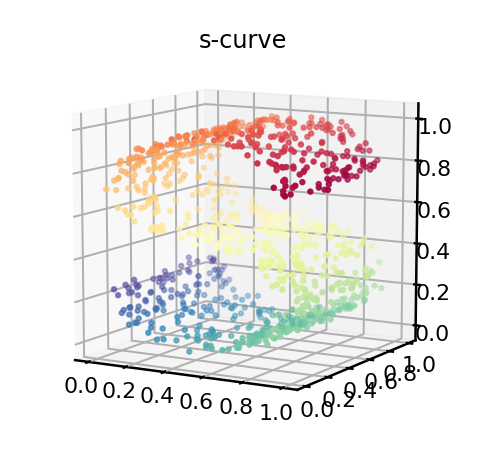

In [6]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

## Swiss Roll

In [7]:
dataset_name = 'swiss-roll'
func = partial(datasets.samples_generator.make_swiss_roll, n_points, noise=noise, random_state=random_state)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [1000],
 'load_function_kwargs': {'noise': 0.05, 'random_state': 6502},
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_swiss_roll',
 'rescale': 'minmax',
 'load_function': functools.partial(<function make_swiss_roll at 0x7f2b6348e7b8>, 1000, noise=0.05, random_state=6502)}

Synthetic data produced by: sklearn.datasets.samples_generator.make_swiss_roll

>>> make_swiss_roll(1000, noise=0.05, random_state=6502)

>>> help(make_swiss_roll)

Generate a swiss roll dataset.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of sample points on the S curve.

    noise : float, optional (default=0.0)
        The standard deviation of the gaussian noise.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Returns
    -------
    X : array of shape [n_samples, 3]
        The points.

    t : array of shape [n_samples]
        The univariate position of the sample according to the 

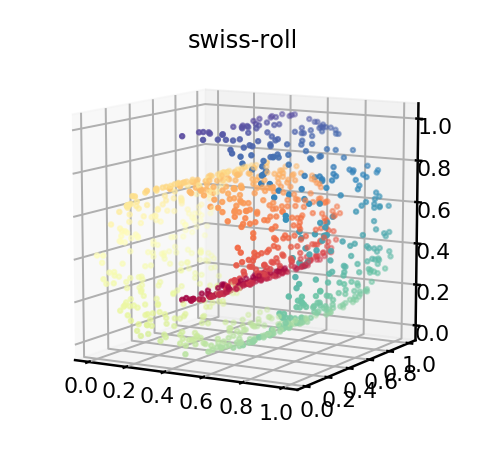

In [8]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

## Gaussian Blobs

In [9]:
dataset_name = 'gaussian-blobs'
func = partial(datasets.samples_generator.make_blobs, n_points, centers=4, n_features=10,
                              random_state=random_state)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [1000],
 'load_function_kwargs': {'centers': 4,
  'n_features': 10,
  'random_state': 6502},
 'load_function_module': 'sklearn.datasets.samples_generator',
 'load_function_name': 'make_blobs',
 'rescale': 'minmax',
 'load_function': functools.partial(<function make_blobs at 0x7f2b6348e2f0>, 1000, centers=4, n_features=10, random_state=6502)}

Synthetic data produced by: sklearn.datasets.samples_generator.make_blobs

>>> make_blobs(1000, n_features=10, centers=4, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=6502)

>>> help(make_blobs)

Generate isotropic Gaussian blobs for clustering.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.

    n_features : int, optional (default=2)
        The number of features for each sample.

    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.

    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.

    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers are
      

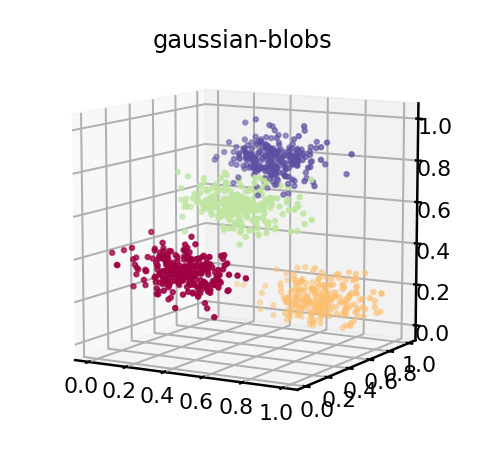

In [10]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

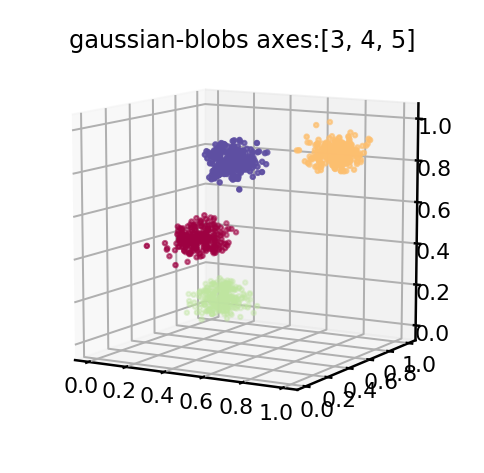

In [11]:
dim_list = [3, 4, 5]
viz.plot_3d_dataset(ds.data, ds.target, title=f"{ds.metadata['dataset_name']} axes:{dim_list}", dim_list=[3, 4, 5]);


## Surface of a Sphere

In [12]:
dataset_name = 'sphere'
func = partial(synthset.sample_sphere_surface, n_points, random_state=random_state, noise=noise)
add_dataset_from_function(dataset_name, func, action='generate')

{'action': 'generate',
 'load_function_args': [1000],
 'load_function_kwargs': {'noise': 0.05, 'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'sample_sphere_surface',
 'rescale': None,
 'load_function': functools.partial(<function sample_sphere_surface at 0x7f2b3da51e18>, 1000, noise=0.05, random_state=6502)}

Synthetic data produced by: src.data.synthetic.sample_sphere_surface

>>> sample_sphere_surface(1000, n_dim=3, random_state=6502, noise=0.05)

>>> help(sample_sphere_surface)

Sample on the surface of a sphere

    See Wolfram Sphere Point Picking
    (Muller 1959, Marsaglia 1972)

    Other ways to do this: http://www-alg.ist.hokudai.ac.jp/~jan/randsphere.pdf,
    Use a very simple trick to color the points in a reasonable way
    


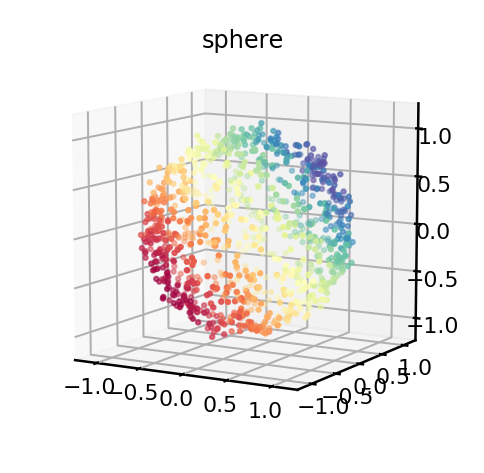

In [13]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f2b39d3c470>)

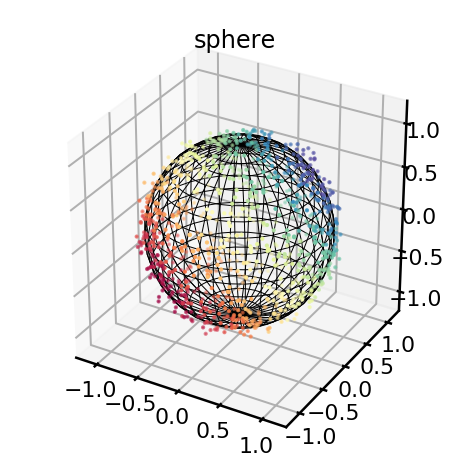

In [14]:
viz.sphere_plot(ds.data, ds.target, title=ds.metadata['dataset_name'], wireframe=True, s=5)

 ## Sample inside a unit ball

In [15]:
dataset_name = 'ball'
func = partial(synthset.sample_ball, n_points, random_state=random_state)
add_dataset_from_function(dataset_name, func, action='generate')

{'action': 'generate',
 'load_function_args': [1000],
 'load_function_kwargs': {'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'sample_ball',
 'rescale': None,
 'load_function': functools.partial(<function sample_ball at 0x7f2b3da51ea0>, 1000, random_state=6502)}

Synthetic data produced by: src.data.synthetic.sample_ball

>>> sample_ball(1000, n_dim=3, random_state=6502)

>>> help(sample_ball)

Sample from a unit ball

    Use rejection sampling on the unit cube
    


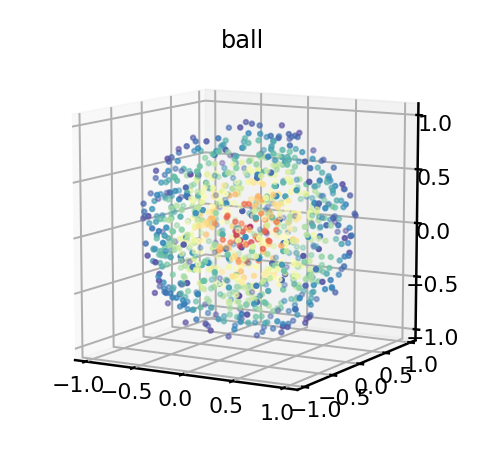

In [16]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f2b39cc9240>)

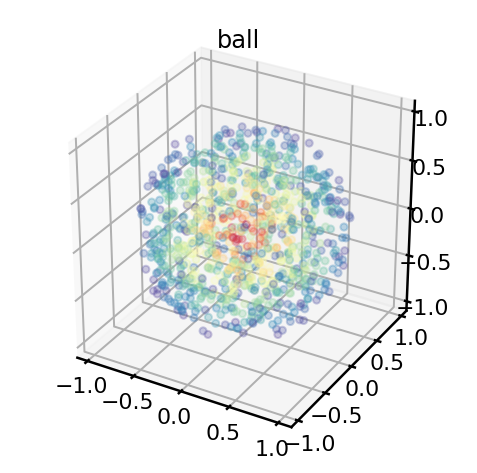

In [17]:
viz.sphere_plot(ds.data, ds.target, alpha=0.3, title=ds.metadata['dataset_name'])

## Helix

In [18]:
dataset_name = 'helix'
func = partial(synthset.helix, random_state=random_state)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [],
 'load_function_kwargs': {'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'helix',
 'rescale': 'minmax',
 'load_function': functools.partial(<function helix at 0x7f2b3da51f28>, random_state=6502)}

Synthetic data produced by: src.data.synthetic.helix

>>> helix(n_points=1000, random_state=6502, noise=0.05, n_twists=8, major_radius=2.0, minor_radius=1.0, n_classes=None, n_occur=1)

>>> help(helix)

Sample from a toroidal helix; i.e. use the parameterization:

    x = R + r cos(nt)) * cos(t)
    y = R + r cos(nt)) * sin(t)
    z = r sin(nt)

    X = (x, y, z) + noise

    where $n$ is `n_twists`, $R$ is the `major_radius`
    and $r$ is the `minor_radius`, and $t$ ranges from 0 .. 2*pi

    Label is currently just $t$

    Parameters
    ----------
    major_radius:
        Major (equatorial) radius of the torus
    minor_radius:
        Minor (cross-section) radius of the torus
    n_twists:
        Number of twists in the toroidal helix
    n_points:
        Number of points to return
    n_classes: int or None
        If None, target vector is the manifold coordinate (t), before noise
        If int, the manifold parameter is bucketized into this many classes.
          The non-

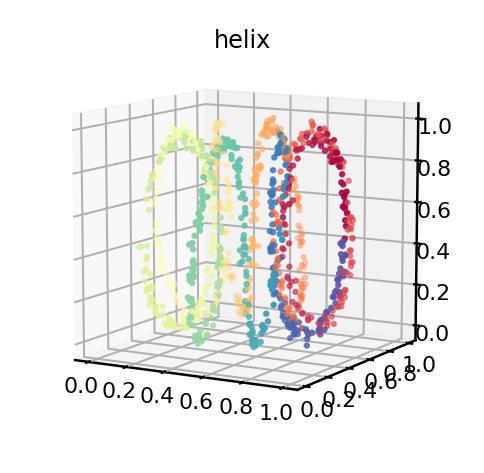

In [19]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

## Broken Swiss Roll

In [20]:
dataset_name = 'broken-swiss-roll'
func = partial(synthset.synthetic_data, kind='broken_swiss_roll', random_state=random_state, noise=noise, n_points=1000)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [],
 'load_function_kwargs': {'kind': 'broken_swiss_roll',
  'n_points': 1000,
  'noise': 0.05,
  'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'synthetic_data',
 'rescale': 'minmax',
 'load_function': functools.partial(<function synthetic_data at 0x7f2b3da51d90>, kind='broken_swiss_roll', n_points=1000, noise=0.05, random_state=6502)}

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(n_points=1000, noise=0.05, random_state=6502, kind='broken_swiss_roll', n_classes=None, n_occur=1)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'swiss_roll', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    n_classes: None or int
        If None, target vector is based on underlying manifold coordinate
        If int, the manifold coordinate is bucketized into this many classes.
    n_occur: int
        Number of occurrences of a given class (along a given axis)
        ignored if n_classes = None
    noise : double or None (default=0.05)
        St

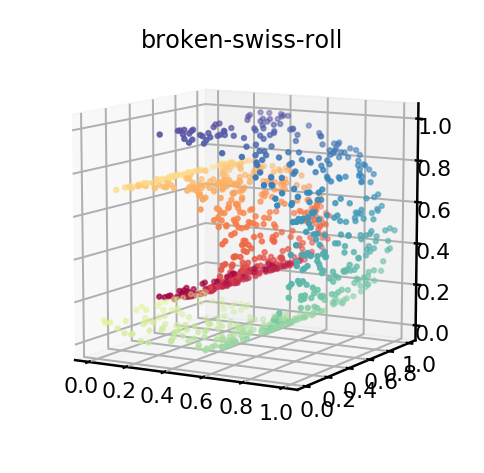

In [21]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

## 5-dimensional "Difficult"

In [22]:
dataset_name = 'difficult'
func = partial(synthset.synthetic_data, kind='difficult', random_state=random_state, noise=0.02, n_points=6000)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [],
 'load_function_kwargs': {'kind': 'difficult',
  'n_points': 6000,
  'noise': 0.02,
  'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'synthetic_data',
 'rescale': 'minmax',
 'load_function': functools.partial(<function synthetic_data at 0x7f2b3da51d90>, kind='difficult', n_points=6000, noise=0.02, random_state=6502)}

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(n_points=6000, noise=0.02, random_state=6502, kind='difficult', n_classes=None, n_occur=1)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'swiss_roll', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    n_classes: None or int
        If None, target vector is based on underlying manifold coordinate
        If int, the manifold coordinate is bucketized into this many classes.
    n_occur: int
        Number of occurrences of a given class (along a given axis)
        ignored if n_classes = None
    noise : double or None (default=0.05)
        Standard d

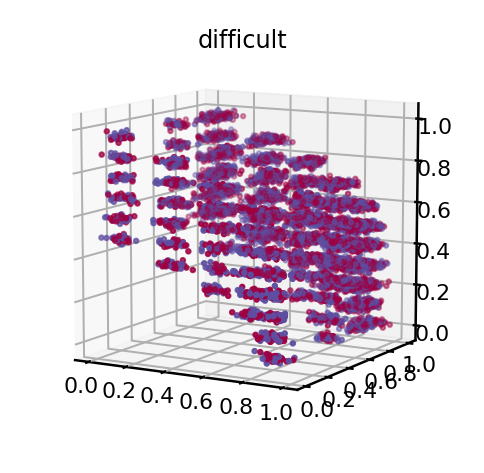

In [23]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

# Twin Peaks

In [24]:
dataset_name = 'twinpeaks'
func = partial(synthset.synthetic_data, kind='twinpeaks', random_state=random_state, noise=noise, n_points=3000, n_classes=3)
add_dataset_from_function(dataset_name, func, action='generate', rescale='minmax')

{'action': 'generate',
 'load_function_args': [],
 'load_function_kwargs': {'kind': 'twinpeaks',
  'n_classes': 3,
  'n_points': 3000,
  'noise': 0.05,
  'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'synthetic_data',
 'rescale': 'minmax',
 'load_function': functools.partial(<function synthetic_data at 0x7f2b3da51d90>, kind='twinpeaks', n_classes=3, n_points=3000, noise=0.05, random_state=6502)}

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(n_points=3000, noise=0.05, random_state=6502, kind='twinpeaks', n_classes=3, n_occur=1)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'swiss_roll', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    n_classes: None or int
        If None, target vector is based on underlying manifold coordinate
        If int, the manifold coordinate is bucketized into this many classes.
    n_occur: int
        Number of occurrences of a given class (along a given axis)
        ignored if n_classes = None
    noise : double or None (default=0.05)
        Standard devi

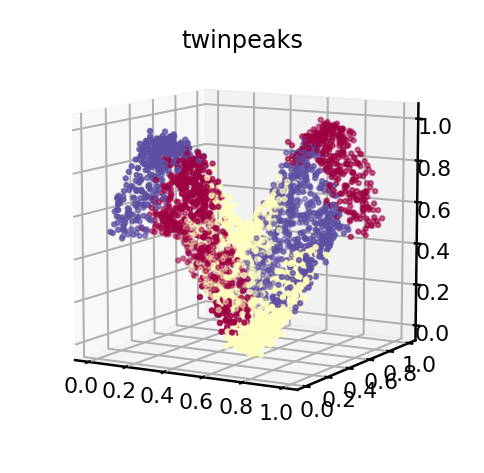

In [25]:
ds = load_dataset(dataset_name, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

# Unit Cube

In [26]:
dataset_name = 'unit-cube'
func = partial(synthset.synthetic_data, kind="unit_cube", random_state=random_state, noise=noise, n_points=3000)
add_dataset_from_function(dataset_name, func, action='generate')


{'action': 'generate',
 'load_function_args': [],
 'load_function_kwargs': {'kind': 'unit_cube',
  'n_points': 3000,
  'noise': 0.05,
  'random_state': 6502},
 'load_function_module': 'src.data.synthetic',
 'load_function_name': 'synthetic_data',
 'rescale': None,
 'load_function': functools.partial(<function synthetic_data at 0x7f2b3da51d90>, kind='unit_cube', n_points=3000, noise=0.05, random_state=6502)}

Synthetic data produced by: src.data.synthetic.synthetic_data

>>> synthetic_data(n_points=10000, noise=None, random_state=6502, kind='unit_cube', n_classes=2, n_occur=1)

>>> help(synthetic_data)

Make a synthetic dataset

    A sample dataset generators in the style of sklearn's
    `sample_generators`. This adds other functions found in the Matlab
    toolkit for Dimensionality Reduction

    Parameters
    ----------
    kind: {'unit_cube', 'swiss_roll', 'broken_swiss_roll', 'twinpeaks', 'difficult'}
        The type of synthetic dataset
    n_points : int, optional (default=1000)
        The total number of points generated.
    n_classes: None or int
        If None, target vector is based on underlying manifold coordinate
        If int, the manifold coordinate is bucketized into this many classes.
    n_occur: int
        Number of occurrences of a given class (along a given axis)
        ignored if n_classes = None
    noise : double or None (default=0.05)
        Standard dev

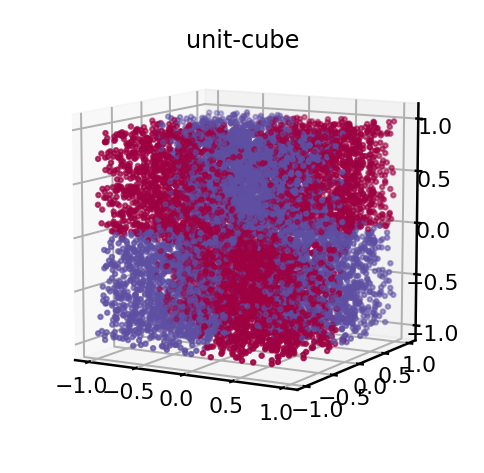

In [27]:
ds = load_dataset(dataset_name, n_classes=2, noise=None, n_points=10000, force=True)
print(ds.DESCR)
viz.plot_3d_dataset(ds.data, ds.target, title=ds.metadata['dataset_name']);

In [28]:
available_datasets(action='generate')

['ball',
 'broken-swiss-roll',
 'difficult',
 'gaussian-blobs',
 'helix',
 's-curve',
 'sphere',
 'swiss-roll',
 'twinpeaks',
 'unit-cube']